# Goal: Creating a popcorn map representing genres and relationships of a spotify song dataset <br>
## Loading and scaling the dataset:

In [1]:
import pandas as pd
from IPython.display import display, Markdown

df = pd.read_csv("data/raw_data/dataset.csv", index_col=0)
display(Markdown("**Loaded Spotify Tracks Dataset from Kaggle:**\n"))
print(f"Rows count: {df.shape[0]}  |  Columns count: {df.shape[1]}")
display(Markdown("### Overview of dataset"))
df_cols = df.columns
df_cols_str = " ".join([f"`{c}`" for c in df_cols])
display(Markdown("**Columns:**<br>" + df_cols_str))

display(Markdown("**First 5 rows of dataset:**"))
display(df.head(5))

**Loaded Spotify Tracks Dataset from Kaggle:**


Rows count: 114000  |  Columns count: 20


### Overview of dataset

**Columns:**<br>`track_id` `artists` `album_name` `track_name` `popularity` `duration_ms` `explicit` `danceability` `energy` `key` `loudness` `mode` `speechiness` `acousticness` `instrumentalness` `liveness` `valence` `tempo` `time_signature` `track_genre`

**First 5 rows of dataset:**

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### Forming the working dataset with key features for processing:
**Features- mode, key and liveness are left out because they could add too much noise**
<br>
**Duration and tempo are transformed to control spikes in data**


In [2]:
from scipy.stats._mstats_basic import winsorize
import numpy as np

dataset_features = [
    'danceability',
    'energy',
    'loudness',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'valence',
    'tempo',
    'duration_ms'
]

df_working = df.dropna(subset=dataset_features).reset_index(drop=True)

Set = df_working[dataset_features].copy()
Set["duration_ms"] = np.log1p(Set["duration_ms"])
Set["tempo"] = winsorize(Set["tempo"], limits=(0.01, 0.01))

Set_cols = Set.columns
Set_cols_str = " ".join([f"`{c}`" for c in Set_cols])
display(Markdown("**Columns:**<br>" + Set_cols_str))
display(Markdown("**First 5 rows of working dataset:**"))
display(Set.head(5))

**Columns:**<br>`danceability` `energy` `loudness` `speechiness` `acousticness` `instrumentalness` `valence` `tempo` `duration_ms`

**First 5 rows of working dataset:**

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms
0,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.715,87.917,12.348730
1,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.267,77.489,11.915794
2,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.120,76.332,12.258793
3,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.143,181.740,12.215696
4,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.167,119.949,12.200326


### Standardizing the data in the working dataset:

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Set_scaled = scaler.fit_transform(Set)

display(Markdown("**Data normalized with StandardScaler:**"))
print(f"Working set shape: {Set_scaled.shape}")

display(Markdown("**First 5 rows of standardized working dataset:**"))
df_scaled = pd.DataFrame(Set_scaled, columns=dataset_features, index=df_working.index)

df_scaled.head(5)

**Data normalized with StandardScaler:**

Working set shape: (114000, 9)


**First 5 rows of standardized working dataset:**

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms
0,0.629244,-0.717148,0.300828,0.551848,-0.850202,-0.504109,0.929306,-1.166796,0.221311
1,-0.845908,-1.889980,-1.784744,-0.078993,1.831732,-0.504094,-0.798690,-1.521474,-0.908708
2,-0.742186,-1.122669,-0.293288,-0.273826,-0.315499,-0.504112,-1.365688,-1.560826,-0.013436
3,-1.733304,-2.312994,-2.039252,-0.457309,1.774593,-0.503883,-1.276974,2.024321,-0.125925
4,0.295030,-0.788711,-0.282750,-0.303145,0.463399,-0.504112,-1.184403,-0.077320,-0.166043


## Neighborhood Embedding on standardized dataset with 2D-UMAP to generate x & y coordinates for the popcorn map:

### Configuring 2D-UMAP parameters:

In [4]:
import umap.umap_ as umap

umap_params = dict(
    n_neighbors=45,
    min_dist=0.15,
    n_components=2,
    metric="euclidean",
    random_state=42
)

### Fitting UMAP on the standardized dataset:

In [5]:
reducer2 = umap.UMAP(**umap_params)
embedding_2d = reducer2.fit_transform(Set_scaled)

embedding_2d.shape

/home/david/miniconda3/envs/clustering/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(114000, 2)

### Adding resulting UMAP coordinates to original dataset and plotting for overview of 2D-neighborhood distribution:

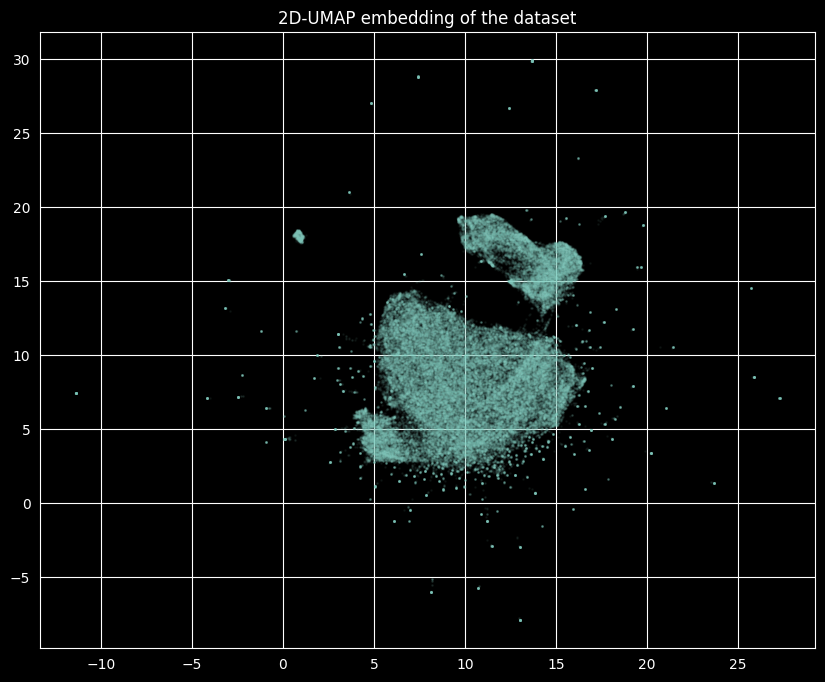

In [6]:
import matplotlib.pyplot as plt

df_working["x"] = embedding_2d[:, 0]
df_working["y"] = embedding_2d[:, 1]

plt.figure(figsize=(10, 8))
plt.scatter(
    df_working["x"],
    df_working["y"],
    s=1,
    alpha=0.05
)
plt.title("2D-UMAP embedding of the dataset")
plt.show()

**Explanation:**
<br>
 This shows how the neighborhoods in the original dataset are distributed, so which songs are similar to others. This is purely for further visualization with the popcorn map. <br>
 For the clustering, a UMAP-algorithm with 10 Dimensions will be used because it preserves more of the local neighborhood structure and density information and does not flatten them too much for visualization.

## Clustering the data with K-MEANS:

### Configuring K-MEANS Parameters:

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=40,
    random_state=42,
    n_init="auto"
)

### Fitting K-MEANS on the scaled dataset:

In [8]:
kmeans.fit(Set_scaled)

KMeans(n_clusters=40, random_state=42)

### Adding Clustering labels to original dataset:

In [9]:
kmeans_labels = kmeans.predict(Set_scaled)
df_working["kmeans_cluster"] = kmeans_labels

### Plotting the 2D-UMAP colored by the resulting cluster labels from K-MEANS

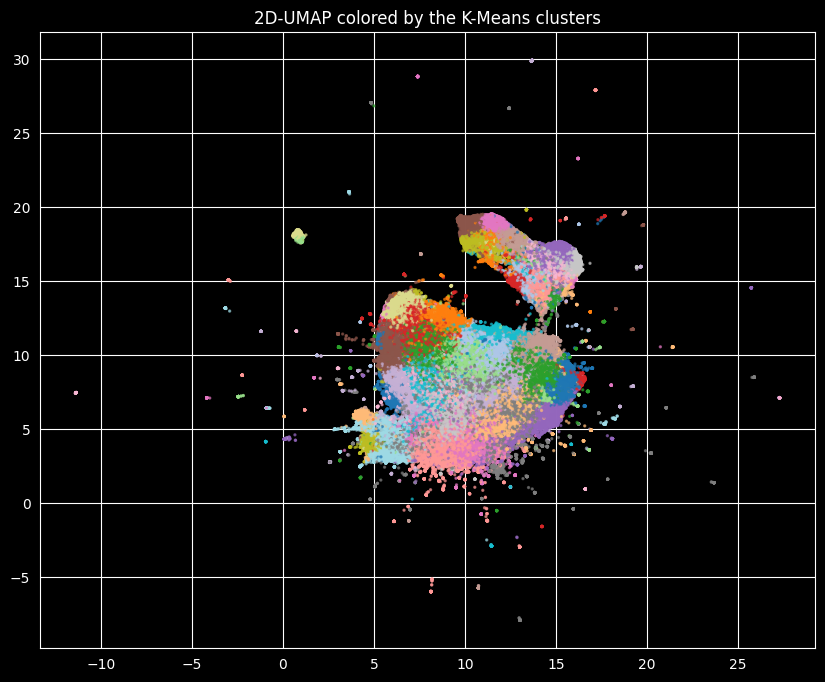

In [10]:
plt.figure(figsize=(10, 8))

plt.scatter(
    df_working["x"],
    df_working["y"],
    c=df_working["kmeans_cluster"],
    s=2,
    cmap="tab20",
    alpha=0.6
)
plt.title("2D-UMAP colored by the K-Means clusters")
plt.show()


## Creating Popcorn Map:

## Aggregating songs and cluster labels per genre for the bubbles on the popcorn map:

**There are two options for displaying the genres and their respective cluster affiliations on the map:** <br> **The first option is to create one bubble on the map per genre and assigning to it the color of the most dominant cluster in the genre.** <br>
 **The second option is to create more bubbles on the map according to the number of clusters in one respective genre.** <br>
 **I will do both options to compare.**


### First Option:

**Grouping songs in original dataset by genres and calculating centers for their bubble on the map:**

In [11]:
genre_groups_option1 = df_working.groupby("track_genre")
genre_centers_option1 = genre_groups_option1[["x", "y"]].median().reset_index()

**Selecting most dominant cluster per genre and assigning it to the respective bubble on the map:**

In [12]:
genre_cluster_option1 = (
    genre_groups_option1["kmeans_cluster"]
    .agg(lambda x: x.value_counts().idxmax())
    .reset_index(name="dominant_cluster")
)

genre_option1_map = genre_centers_option1.merge(genre_cluster_option1, on="track_genre")


<br>

### Second option:

**Grouping songs in original dataset by clusters per genre and calculating centers for their respective bubbles on the map:**

In [13]:
genre_groups_option2 = df_working.groupby(["track_genre", "kmeans_cluster"])

genre_centers_option2 = (
    genre_groups_option2[["x", "y"]]
    .median()
    .reset_index()
)

**Calculating the number of songs per bubble per genre for bubble size and scaling the sizes:**

In [14]:
genre_groups_option2_sizes = genre_groups_option2.size().reset_index(name="count")

genre_option2_map = genre_centers_option2.merge(
    genre_groups_option2_sizes,
    on=["track_genre", "kmeans_cluster"]
)

#Scaling the size
genre_option2_map["size"] = np.sqrt(genre_option2_map["count"])

**Filtering very small bubbles per genre out so that not too many bubbles per genre get created with little songs:**

In [15]:
genre_cluster_option2_map = genre_option2_map[
    genre_option2_map["count"] >= 50
    ]

## Popcorn Mapping for each genre from the original dataset:

In [16]:
import plotly.graph_objects as go
import plotly.io as pio

pio.renderers.default = "iframe"

fig = go.Figure()

#Finding dominant genre per cluster to add as hover info per bubble
cluster_dominant_genre = (
    df_working
    .groupby("kmeans_cluster")["track_genre"]
    .agg(lambda x: x.value_counts().idxmax())
    .reset_index(name="dominant_genre")
)

dominant_genre_per_bubble = (
    genre_option1_map["dominant_cluster"]
    .map(
        cluster_dominant_genre
        .set_index("kmeans_cluster")["dominant_genre"]
    )
)


#Plotting the bubbles:

fig.add_trace(go.Scatter(
    x=genre_option1_map["x"],
    y=genre_option1_map["y"],
    mode="markers",
    marker=dict(
        size=75,
        color=genre_option1_map["dominant_cluster"],
        colorscale="balance",
        opacity=0.15,
        line=dict(width=0)
    ),
    hoverinfo="skip"
))

fig.add_trace(go.Scatter(
    x=genre_option1_map["x"],
    y=genre_option1_map["y"],
    mode="markers",
    marker=dict(
        size=55,
        color=genre_option1_map["dominant_cluster"],
        colorscale="balance",
        opacity=0.85
    ),
   hovertemplate=(
        "<b>Genre:</b> %{customdata[0]}<br>"
        "<b>Dominant Cluster:</b> %{customdata[1]}<br>"
        "<b>Dominant Genre for Cluster:</b> %{customdata[2]}<br>"
        "<extra></extra>"
    ),
    customdata=list(
        zip(
            genre_option1_map["track_genre"],
            genre_option1_map["dominant_cluster"],
            dominant_genre_per_bubble
        )
    )
))

fig.add_trace(go.Scatter(
    x=genre_option1_map["x"],
    y=genre_option1_map["y"],
    mode="text",
    text=genre_option1_map["track_genre"],
    textfont=dict(size=10, color="black"),
    textposition="middle center",
    hoverinfo="skip"
))

fig.update_layout(
    title="Popcorn Map for Song genres and similarities",
    title_x=0.5,
    title_xanchor="center",
    showlegend=False,
    font=dict(
        size=20,
        family="Arial",
        color="white"
    ),
    autosize=True,
    height=1000,
    xaxis=dict(visible=False),
    yaxis=dict(visible=False),
    margin=dict(l=10, r=10, t=50, b=10),
    dragmode="pan",

)

fig.show(config={"responsive": True})


## List of all clusters with the respective genres contained in them:

In [17]:
from src.evaluation_utils import cluster_genre_stats, dominant_genres, show_cluster

dist = cluster_genre_stats(df_working)

for cluster_id in sorted(df_working["kmeans_cluster"].unique()):
    print(f"\n=== Cluster {cluster_id} ===")
    display(show_cluster(dist, cluster_id, top_n=10))



=== Cluster 0 ===


,kmeans_cluster,track_genre,count,share
19,0,death-metal,297,0.093958
66,0,metalcore,278,0.087947
46,0,heavy-metal,200,0.063271
6,0,black-metal,150,0.047453
65,0,metal,136,0.043024
38,0,grindcore,117,0.037014
40,0,grunge,113,0.035748
53,0,industrial,101,0.031952
44,0,hardcore,97,0.030686
37,0,goth,89,0.028156



=== Cluster 1 ===


,kmeans_cluster,track_genre,count,share
111,1,children,213,0.238789
152,1,kids,147,0.164798
120,1,disney,43,0.048206
176,1,show-tunes,26,0.029148
150,1,jazz,25,0.028027
174,1,sad,24,0.026906
185,1,trance,23,0.025785
175,1,samba,20,0.022422
112,1,chill,16,0.017937
141,1,idm,15,0.016816



=== Cluster 2 ===


,kmeans_cluster,track_genre,count,share
258,2,mandopop,194,0.047468
228,2,gospel,156,0.038170
301,2,world-music,145,0.035478
217,2,dubstep,141,0.034500
200,2,cantopop,131,0.032053
207,2,country,123,0.030095
216,2,dub,112,0.027404
197,2,brazil,82,0.020064
250,2,j-pop,78,0.019085
300,2,turkish,76,0.018596



=== Cluster 3 ===


,kmeans_cluster,track_genre,count,share
307,3,black-metal,325,0.199020
315,3,death-metal,183,0.112064
333,3,grindcore,172,0.105328
347,3,iranian,133,0.081445
314,3,club,77,0.047152
342,3,idm,52,0.031843
372,3,trance,42,0.025720
332,3,goth,36,0.022045
346,3,industrial,36,0.022045
310,3,breakbeat,32,0.019596



=== Cluster 4 ===


,kmeans_cluster,track_genre,count,share
450,4,romance,149,0.053424
437,4,opera,138,0.049480
374,4,acoustic,112,0.040158
386,4,cantopop,109,0.039082
459,4,songwriter,104,0.037289
456,4,singer-songwriter,104,0.037289
433,4,mandopop,100,0.035855
455,4,show-tunes,91,0.032628
402,4,folk,87,0.031194
469,4,world-music,80,0.028684



=== Cluster 5 ===


,kmeans_cluster,track_genre,count,share
511,5,sleep,328,0.380952
483,5,disney,66,0.076655
489,5,german,61,0.070848
476,5,british,49,0.056911
500,5,iranian,44,0.051103
495,5,idm,41,0.047619
504,5,opera,35,0.040650
471,5,ambient,35,0.040650
472,5,anime,29,0.033682
503,5,new-age,25,0.029036



=== Cluster 6 ===


,kmeans_cluster,track_genre,count,share
560,6,hardstyle,149,0.125845
557,6,happy,121,0.102196
580,6,metalcore,53,0.044764
543,6,dubstep,44,0.037162
541,6,drum-and-bass,42,0.035473
559,6,hardcore,42,0.035473
542,6,dub,30,0.025338
564,6,idm,28,0.023649
568,6,industrial,28,0.023649
536,6,death-metal,27,0.022804



=== Cluster 7 ===


,kmeans_cluster,track_genre,count,share
675,7,j-idol,279,0.056329
691,7,party,179,0.036140
661,7,hard-rock,163,0.032909
685,7,metal,149,0.030083
616,7,alt-rock,140,0.028266
672,7,industrial,140,0.028266
677,7,j-rock,132,0.026651
676,7,j-pop,128,0.025843
717,7,synth-pop,125,0.025237
699,7,punk-rock,121,0.024430



=== Cluster 8 ===


,kmeans_cluster,track_genre,count,share
770,8,hardstyle,298,0.065871
751,8,dubstep,204,0.045093
793,8,metalcore,188,0.041556
803,8,progressive-house,187,0.041335
828,8,trance,176,0.038904
771,8,heavy-metal,167,0.036914
750,8,dub,153,0.033820
766,8,grunge,151,0.033378
767,8,happy,144,0.031830
779,8,industrial,144,0.031830



=== Cluster 9 ===


,kmeans_cluster,track_genre,count,share
843,9,cantopop,281,0.063733
894,9,mandopop,239,0.054207
921,9,singer-songwriter,174,0.039465
923,9,songwriter,174,0.039465
832,9,acoustic,165,0.037423
880,9,indian,141,0.031980
903,9,pop-film,134,0.030392
893,9,malay,123,0.027897
869,9,gospel,119,0.026990
863,9,folk,110,0.024949



=== Cluster 10 ===


,kmeans_cluster,track_genre,count,share
939,10,comedy,317,0.7925
956,10,kids,12,0.0300
954,10,jazz,5,0.0125
952,10,iranian,5,0.0125
962,10,show-tunes,5,0.0125
936,10,children,4,0.0100
953,10,j-dance,4,0.0100
934,10,afrobeat,3,0.0075
963,10,study,3,0.0075
948,10,garage,3,0.0075



=== Cluster 11 ===


,kmeans_cluster,track_genre,count,share
1079,11,world-music,100,0.025523
1036,11,mandopop,98,0.025013
1050,11,psych-rock,85,0.021695
1068,11,songwriter,79,0.020163
1065,11,singer-songwriter,79,0.020163
1006,11,gospel,77,0.019653
1078,11,turkish,77,0.019653
1077,11,trip-hop,76,0.019398
1056,11,rock,72,0.018377
1023,11,indie-pop,72,0.018377



=== Cluster 12 ===


,kmeans_cluster,track_genre,count,share
1142,12,opera,195,0.054883
1156,12,romance,157,0.044188
1161,12,show-tunes,143,0.040248
1171,12,tango,123,0.034619
1133,12,jazz,107,0.030115
1138,12,mandopop,103,0.028990
1091,12,cantopop,101,0.028427
1166,12,soul,98,0.027582
1080,12,acoustic,93,0.026175
1165,12,songwriter,91,0.025612



=== Cluster 13 ===


,kmeans_cluster,track_genre,count,share
1199,13,grindcore,562,0.517972
1188,13,death-metal,50,0.046083
1204,13,hardcore,49,0.045161
1222,13,power-pop,48,0.044240
1213,13,iranian,40,0.036866
1196,13,garage,36,0.033180
1181,13,black-metal,32,0.029493
1230,13,sleep,22,0.020276
1184,13,british,14,0.012903
1217,13,j-rock,14,0.012903



=== Cluster 14 ===


,kmeans_cluster,track_genre,count,share
1315,14,reggaeton,364,0.067910
1296,14,latino,346,0.064552
1295,14,latin,336,0.062687
1314,14,reggae,329,0.061381
1321,14,salsa,189,0.035261
1253,14,dancehall,184,0.034328
1280,14,hip-hop,175,0.032649
1252,14,dance,128,0.023881
1256,14,disco,122,0.022761
1236,14,afrobeat,118,0.022015



=== Cluster 15 ===


,kmeans_cluster,track_genre,count,share
1357,15,drum-and-bass,343,0.158943
1410,15,trance,192,0.088971
1374,15,happy,187,0.086654
1344,15,black-metal,117,0.054217
1347,15,breakbeat,105,0.048656
1377,15,hardstyle,104,0.048193
1353,15,death-metal,75,0.034754
1385,15,iranian,75,0.034754
1352,15,club,74,0.034291
1397,15,progressive-house,65,0.030120



=== Cluster 16 ===


,kmeans_cluster,track_genre,count,share
1490,16,power-pop,142,0.035723
1508,16,ska,132,0.033208
1494,16,punk-rock,124,0.031195
1480,16,metal,116,0.029182
1453,16,grunge,115,0.028931
1493,16,punk,115,0.028931
1415,16,alt-rock,110,0.027673
1472,16,j-rock,105,0.026415
1456,16,hard-rock,100,0.025157
1416,16,alternative,97,0.024403



=== Cluster 17 ===


,kmeans_cluster,track_genre,count,share
1573,17,minimal-techno,626,0.202327
1590,17,techno,449,0.145120
1536,17,detroit-techno,361,0.116677
1591,17,trance,206,0.066580
1559,17,idm,175,0.056561
1529,17,chicago-house,158,0.051067
1592,17,trip-hop,130,0.042017
1527,17,breakbeat,120,0.038785
1543,17,electronic,111,0.035876
1535,17,deep-house,107,0.034583



=== Cluster 18 ===


,kmeans_cluster,track_genre,count,share
1669,18,rock-n-roll,237,0.067811
1670,18,rockabilly,204,0.058369
1635,18,honky-tonk,189,0.054077
1605,18,children,189,0.054077
1685,18,tango,166,0.047496
1600,18,bluegrass,120,0.034335
1665,18,r-n-b,114,0.032618
1674,18,samba,97,0.027754
1601,18,blues,91,0.026037
1680,18,soul,86,0.024607



=== Cluster 19 ===


,kmeans_cluster,track_genre,count,share
1768,19,power-pop,197,0.043060
1771,19,punk,191,0.041749
1772,19,punk-rock,189,0.041311
1748,19,j-idol,159,0.034754
1786,19,ska,148,0.032350
1750,19,j-rock,119,0.026011
1722,19,forro,118,0.025792
1735,19,hardcore,104,0.022732
1707,19,country,93,0.020328
1749,19,j-pop,93,0.020328



=== Cluster 20 ===


,kmeans_cluster,track_genre,count,share
1818,20,sleep,395,0.291298
1815,20,piano,227,0.167404
1800,20,ambient,204,0.150442
1804,20,classical,123,0.090708
1813,20,new-age,64,0.047198
1806,20,disney,62,0.045723
1808,20,german,53,0.039086
1809,20,guitar,42,0.030973
1814,20,opera,38,0.028024
1811,20,iranian,33,0.024336



=== Cluster 21 ===


,kmeans_cluster,track_genre,count,share
1860,21,honky-tonk,403,0.110079
1909,21,tango,322,0.087954
1871,21,jazz,235,0.064190
1894,21,romance,212,0.057908
1892,21,rock-n-roll,127,0.034690
1833,21,chill,124,0.033871
1895,21,sad,120,0.032778
1821,21,acoustic,111,0.030320
1900,21,singer-songwriter,101,0.027588
1903,21,songwriter,101,0.027588



=== Cluster 22 ===


,kmeans_cluster,track_genre,count,share
1976,22,metalcore,214,0.057697
1934,22,drum-and-bass,173,0.046643
1951,22,grunge,167,0.045026
1956,22,heavy-metal,159,0.042869
1975,22,metal,145,0.039094
1919,22,black-metal,140,0.037746
1952,22,happy,124,0.033432
1932,22,death-metal,120,0.032354
1987,22,punk,100,0.026961
1936,22,dubstep,100,0.026961



=== Cluster 23 ===


,kmeans_cluster,track_genre,count,share
2089,23,study,586,0.238308
2048,23,guitar,307,0.124847
2027,23,chill,131,0.053274
2092,23,tango,108,0.043920
2017,23,anime,103,0.041887
2054,23,idm,92,0.037414
2016,23,ambient,83,0.033754
2081,23,sad,72,0.029280
2035,23,disney,71,0.028874
2070,23,new-age,62,0.025214



=== Cluster 24 ===


,kmeans_cluster,track_genre,count,share
2168,24,party,385,0.073069
2129,24,forro,232,0.044031
2119,24,disco,200,0.037958
2146,24,house,182,0.034542
2190,24,ska,133,0.025242
2158,24,kids,128,0.024293
2117,24,deep-house,125,0.023724
2124,24,edm,122,0.023154
2187,24,sertanejo,117,0.022205
2115,24,dance,105,0.019928



=== Cluster 25 ===


,kmeans_cluster,track_genre,count,share
2212,25,classical,342,0.242725
2214,25,disney,167,0.118524
2237,25,piano,153,0.108588
2204,25,ambient,134,0.095103
2223,25,guitar,111,0.078779
2235,25,new-age,86,0.061036
2220,25,german,58,0.041164
2205,25,anime,43,0.030518
2243,25,sleep,38,0.026969
2225,25,idm,37,0.026260



=== Cluster 26 ===


,kmeans_cluster,track_genre,count,share
2339,26,study,226,0.109443
2251,26,afrobeat,148,0.071671
2267,26,club,124,0.060048
2272,26,detroit-techno,79,0.038257
2271,26,deep-house,79,0.038257
2345,26,trip-hop,78,0.037772
2285,26,garage,71,0.034383
2322,26,progressive-house,66,0.031961
2260,26,breakbeat,65,0.031477
2300,26,idm,64,0.030993



=== Cluster 27 ===


,kmeans_cluster,track_genre,count,share
2413,27,pagode,350,0.098398
2377,27,forro,264,0.074220
2431,27,salsa,192,0.053978
2427,27,rock-n-roll,176,0.049480
2432,27,samba,171,0.048074
2428,27,rockabilly,155,0.043576
2433,27,sertanejo,135,0.037953
2354,27,bluegrass,133,0.037391
2391,27,honky-tonk,116,0.032612
2423,27,r-n-b,113,0.031768



=== Cluster 28 ===


,kmeans_cluster,track_genre,count,share
2493,28,hip-hop,185,0.049215
2531,28,sad,175,0.046555
2466,28,dancehall,157,0.041766
2465,28,dance,146,0.038840
2480,28,french,123,0.032721
2506,28,kids,118,0.031391
2477,28,emo,115,0.030593
2461,28,chill,114,0.030327
2508,28,latino,113,0.030061
2499,28,indie-pop,105,0.027933



=== Cluster 29 ===


,kmeans_cluster,track_genre,count,share
2600,29,house,333,0.061011
2579,29,edm,327,0.059912
2572,29,deep-house,291,0.053316
2629,29,progressive-house,268,0.049102
2580,29,electro,202,0.037010
2569,29,dance,189,0.034628
2591,29,groove,155,0.028399
2581,29,electronic,148,0.027116
2654,29,trance,109,0.019971
2588,29,german,108,0.019787



=== Cluster 30 ===


,kmeans_cluster,track_genre,count,share
2669,30,chicago-house,198,0.058981
2754,30,synth-pop,175,0.052130
2680,30,disco,172,0.051236
2730,30,pop-film,110,0.032767
2659,30,afrobeat,105,0.031278
2664,30,blues,98,0.029193
2749,30,ska,96,0.028597
2720,30,malay,86,0.025618
2758,30,trip-hop,80,0.023831
2679,30,detroit-techno,80,0.023831



=== Cluster 31 ===


,kmeans_cluster,track_genre,count,share
2768,31,chicago-house,360,0.210896
2775,31,detroit-techno,317,0.185706
2808,31,minimal-techno,131,0.076743
2767,31,breakbeat,130,0.076157
2797,31,idm,105,0.061511
2831,31,trip-hop,101,0.059168
2761,31,afrobeat,82,0.048037
2829,31,techno,64,0.037493
2774,31,deep-house,45,0.026362
2798,31,industrial,31,0.018161



=== Cluster 32 ===


,kmeans_cluster,track_genre,count,share
2902,32,sad,101,0.078968
2878,32,j-dance,84,0.065676
2861,32,funk,82,0.064113
2881,32,kids,73,0.057076
2905,32,show-tunes,70,0.054730
2849,32,dancehall,68,0.053167
2844,32,chill,67,0.052385
2860,32,french,60,0.046912
2847,32,comedy,40,0.031274
2913,32,tango,33,0.025801



=== Cluster 33 ===


,kmeans_cluster,track_genre,count,share
2951,33,new-age,539,0.253766
2946,33,iranian,300,0.141243
2920,33,ambient,227,0.106874
2929,33,classical,199,0.093691
2943,33,idm,129,0.060734
2953,33,piano,116,0.054614
2939,33,german,103,0.048493
2952,33,opera,73,0.034369
2960,33,sleep,68,0.032015
2941,33,guitar,66,0.031073



=== Cluster 34 ===


,kmeans_cluster,track_genre,count,share
2971,34,comedy,458,0.932790
2968,34,children,7,0.014257
2982,34,show-tunes,4,0.008147
2975,34,funk,4,0.008147
2980,34,romance,2,0.004073
2979,34,jazz,2,0.004073
2978,34,iranian,2,0.004073
2974,34,french,2,0.004073
2969,34,chill,2,0.004073
2967,34,brazil,1,0.002037



=== Cluster 35 ===


,kmeans_cluster,track_genre,count,share
3043,35,romance,279,0.133111
3031,35,opera,270,0.128817
3024,35,jazz,159,0.075859
3046,35,show-tunes,121,0.057729
3001,35,disney,104,0.049618
3049,35,sleep,60,0.028626
2996,35,classical,59,0.028149
3050,35,songwriter,53,0.025286
3047,35,singer-songwriter,53,0.025286
2983,35,acoustic,48,0.022901



=== Cluster 36 ===


,kmeans_cluster,track_genre,count,share
3143,36,salsa,298,0.090248
3125,36,pagode,238,0.072078
3144,36,samba,226,0.068443
3129,36,pop-film,146,0.044216
3145,36,sertanejo,139,0.042096
3106,36,indian,109,0.033010
3115,36,k-pop,98,0.029679
3066,36,bluegrass,94,0.028468
3122,36,mpb,88,0.026651
3119,36,malay,83,0.025136



=== Cluster 37 ===


,kmeans_cluster,track_genre,count,share
3197,37,gospel,226,0.123971
3264,37,world-music,193,0.105869
3169,37,brazil,128,0.070214
3198,37,goth,70,0.038398
3166,37,black-metal,66,0.036204
3200,37,groove,60,0.032913
3238,37,psych-rock,59,0.032364
3191,37,folk,55,0.030170
3204,37,hard-rock,54,0.029622
3225,37,metal,40,0.021942



=== Cluster 38 ===


,kmeans_cluster,track_genre,count,share
3316,38,j-dance,325,0.115700
3282,38,dancehall,234,0.083304
3307,38,hardcore,175,0.062300
3298,38,funk,118,0.042008
3309,38,hip-hop,95,0.033820
3344,38,reggaeton,89,0.031684
3343,38,reggae,87,0.030972
3271,38,brazil,84,0.029904
3363,38,turkish,82,0.029192
3324,38,latino,72,0.025632



=== Cluster 39 ===


,kmeans_cluster,track_genre,count,share
3438,39,reggaeton,129,0.058530
3437,39,reggae,120,0.054446
3421,39,latino,101,0.045826
3406,39,hip-hop,95,0.043103
3413,39,j-dance,88,0.039927
3419,39,kids,79,0.035844
3381,39,dancehall,79,0.035844
3420,39,latin,74,0.033575
3392,39,emo,72,0.032668
3396,39,funk,67,0.030399
